In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# Data Exploratory for Breast Cancer Dataset

In [155]:
#Read the CSV File of Breast Cancer Dataset
df = pd.read_csv(r"datasets\Breast Cancer\data.csv")
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


 Remove missing values from the DataFrame

In [157]:
df.dropna()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


Removes the unwanted data that are in the DataFrame

In [158]:
df = df.loc[df["node-caps"] != "?"]
df = df.loc[df["breast-quad"] != "?"]
df


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


Converted categorical attributes into numerical for correlation studies

|column_title|Attribute 
|---|---|
|Class | no-recurrence-events : 0 , recurrence-events : 1 <br>
age | "10-19" : 1, "20-29" : 2,"30-39" : 3, "40-49" : 4, "50-59" : 5, "60-69" : 6, "70-79" : 7 , "80-89" : 8 ,"90-99" : 9 <br>
menopause | "lt40" : 1 , "ge40" : 2 , "premeno" : 3 <br>
tumor-size| "0-4" : 1 , "5-9":2, "10-14" :3 ,"15-19":4, "20-24" :5, "25-29":6,"30-34":7, "35-39": 8 , "40-44" : 9 , "45-49": 10,"50-54" :11 , "55-59" : 12 <br>
inv-nodes | "0-2" : 1 , "3-5" : 2, "6-8" : 4 , "9-11" :5, "12-14" : 6, "15-17" :7, "18-20" : 8 , "21-23" : 9, "24-26" : 10, "27-29" :11, "30-32" : 12 , "33-35":13, "36-39" :14 <br>
node-caps | "yes" : 1, "no" :0 <br>
deg-malig |  1, 2, 3 <br>
breast | "left" : 1, "right" : 2 <br>
breast-quad | "left_up" : 1, "left_low" : 2 ,"right_up" : 3,"right_low" : 4, "central" :5 <br>
irradiat| "yes" : 1, "no" : 0
 
        


In [159]:
newValues = {"yes" : 1, "no" : 0,"recurrence-events" : 1, "no-recurrence-events" : 0, "10-19" : 1, "20-29" : 2,
             "30-39" : 3, "40-49" : 4, "50-59" : 5, "60-69" : 6, "70-79" : 7 , "80-89" : 8 ,"90-99" : 9 ,
             "lt40" : 1 , "ge40" : 2 , "premeno" : 3, "0-4" : 1 , "5-9":2, "10-14" :3 ,"15-19":4, "20-24" :5, "25-29":6,"30-34":7, "35-39": 8 , "40-44" : 9 , "45-49": 10,
             "50-54" :11 , "55-59" : 12 , "0-2" : 1 , "3-5" : 2, "6-8" : 4 , "9-11" :5, "12-14" :6, "15-17" :7, 
             "18-20" : 8 , "21-23" : 9, "24-26" : 10, "27-29" :11, "30-32" :12 , "33-35":13, "36-39" :14, "left" : 1, "right" :2, "left_up" : 1, "left_low" :2 ,"right_up" :3,"right_low" :4, "central" :5 }
df.replace(newValues, inplace = True)
df

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,3,3,7,1,0,3,1,2,0
1,0,4,3,5,1,0,2,2,3,0
2,0,4,3,5,1,0,2,1,2,0
3,0,6,2,4,1,0,2,2,1,0
4,0,4,3,1,1,0,2,2,4,0
...,...,...,...,...,...,...,...,...,...,...
281,1,3,3,7,1,0,2,1,1,0
282,1,3,3,5,1,0,3,1,1,1
283,1,6,2,5,1,0,1,2,1,0
284,1,4,2,7,2,0,3,1,2,0


Looking through the dataset, we would like to find out which factors allow us to predict the reccurrence / no reccurence events of cancer.

In [160]:
df["class"].value_counts()

0    196
1     81
Name: class, dtype: int64

There are 196 patients that have no reccurence of cancer and 81 patients that have recurrence of cancer.

(array([ 1.,  0., 36.,  0., 89.,  0., 91.,  0., 55.,  5.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

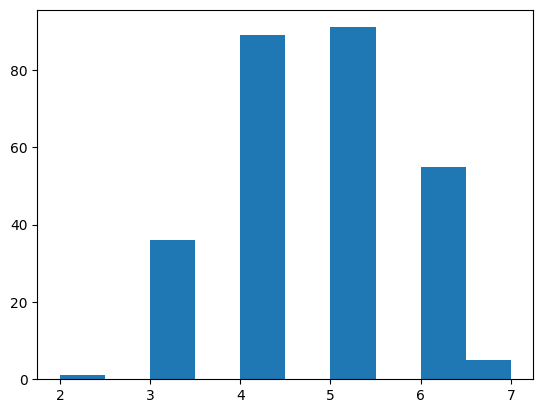

In [161]:
plt.hist(df["age"])

The above shows the distribution of the patient's age group.
column_title| Attribute
|---|---|
age | "10-19" : 1, "20-29" : 2,"30-39" : 3, "40-49" : 4, "50-59" : 5, "60-69" : 6, "70-79" : 7 , "80-89" : 8 ,"90-99" : 9 <br>

3    149
2    123
1      5
Name: menopause, dtype: int64


<AxesSubplot: >

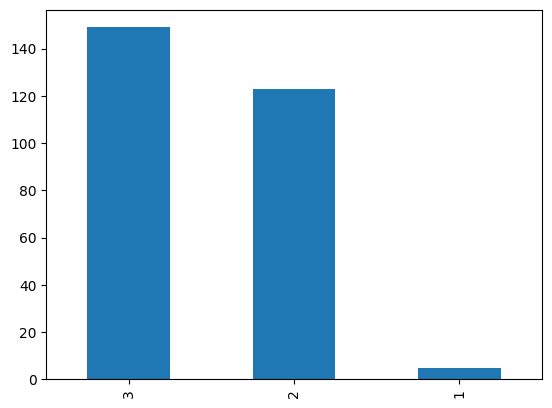

In [162]:
print(df["menopause"].value_counts())
plotdata = df["menopause"].value_counts()
plotdata.plot(kind='bar')

The following are the distribution of patients with different degree of menopause
|column_title|Attribute 
|---|---|
menopause | "lt40" : 1 , "ge40" : 2 , "premeno" : 3 <br>

7     57
6     51
5     48
4     29
3     28
9     22
8     19
1      8
11     8
2      4
10     3
Name: tumor-size, dtype: int64


<AxesSubplot: >

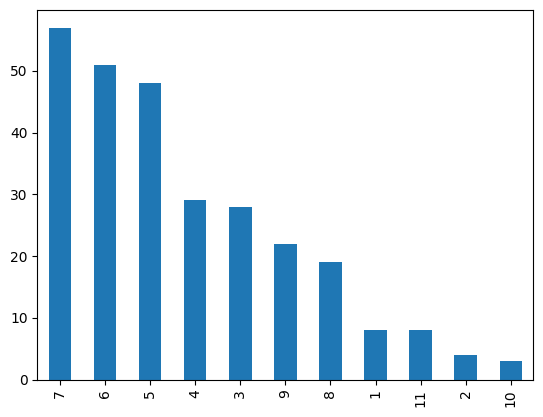

In [163]:
print(df["tumor-size"].value_counts())
plotdata = df["tumor-size"].value_counts()
plotdata.plot(kind='bar')

The following shows the distribution of tumor size of their different group
|column_title|Attribute 
|---|---|
tumor-size| "0-4" : 1 , "5-9":2, "10-14" :3 ,"15-19":4, "20-24" :5, "25-29":6,"30-34":7, "35-39": 8 , "40-44" : 9 , "45-49": 10,"50-54" :11 , "55-59" : 12 <br>

1     209
2      34
4      17
5       7
7       6
6       3
10      1
Name: inv-nodes, dtype: int64


(array([209.,  34.,   0.,  17.,   7.,   3.,   6.,   0.,   0.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

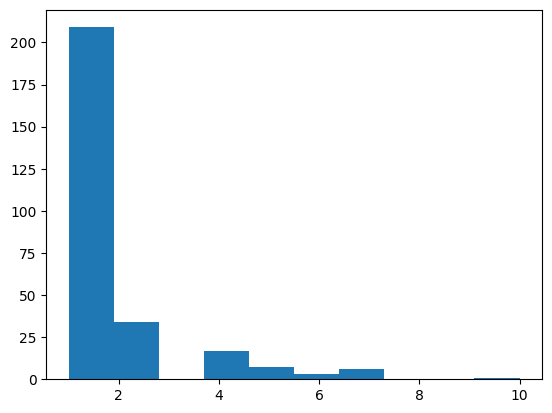

In [164]:
print(df["inv-nodes"].value_counts())
plt.hist(df["inv-nodes"])

The following is the distribution of the inv-nodes.
|column_title|Attribute 
|---|---|
inv-nodes | "0-2" : 1 , "3-5" : 2, "6-8" : 4 , "9-11" :5, "12-14" : 6, "15-17" :7, "18-20" : 8 , "21-23" : 9, "24-26" : 10, "27-29" :11, "30-32" : 12 , "33-35":13, "36-39" :14 <br>

0    221
1     56
Name: node-caps, dtype: int64


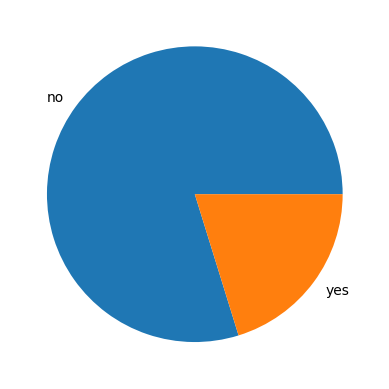

In [165]:
print(df["node-caps"].value_counts())
plt.pie(df['node-caps'].value_counts(), labels = ["no","yes"])
plt.show()

Distribution of patients' node-caps
|column_title|Attribute 
|---|---|
node-caps | "yes" : 1, "no" : 0 <br>

2    129
3     82
1     66
Name: deg-malig, dtype: int64


<AxesSubplot: >

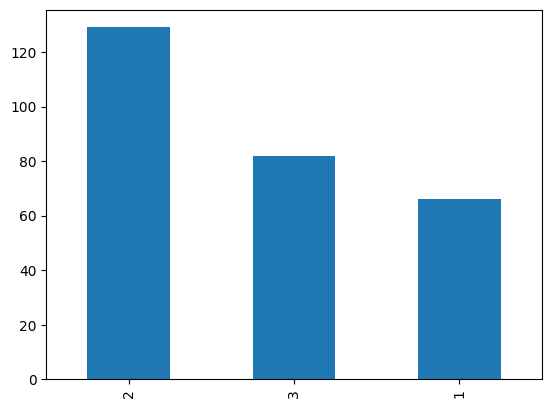

In [166]:
print(df["deg-malig"].value_counts())
plotdata = df["deg-malig"].value_counts()
plotdata.plot(kind='bar')

Patient's distribution of cancer maglignant degrees.
|column_title|Attribute 
|---|---|
deg-malig | 1,2,3 <br>

1    145
2    132
Name: breast, dtype: int64


<AxesSubplot: >

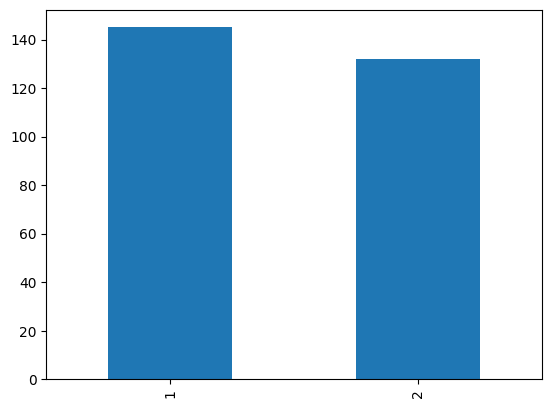

In [167]:
print(df["breast"].value_counts())
plotdata = df["breast"].value_counts()
plotdata.plot(kind = "bar")

Patient's location of breast cancer.
|column_title|Attribute 
|---|---|
breast | 1 : "left" , 2 : "right" <br>

2    106
1     94
3     33
4     23
5     21
Name: breast-quad, dtype: int64


<AxesSubplot: >

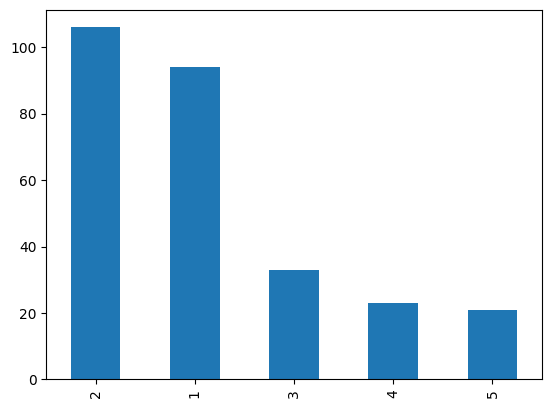

In [168]:
print(df["breast-quad"].value_counts())
plotdata = df["breast-quad"].value_counts()
plotdata.plot(kind = "bar")

Distribution of the precise location of the breast cancer
|column_title|Attribute 
|---|---|
breast-quad | "left_up" : 1, "left_low" : 2 ,"right_up" : 3,"right_low" : 4, "central" :5 <br>

0    215
1     62
Name: irradiat, dtype: int64


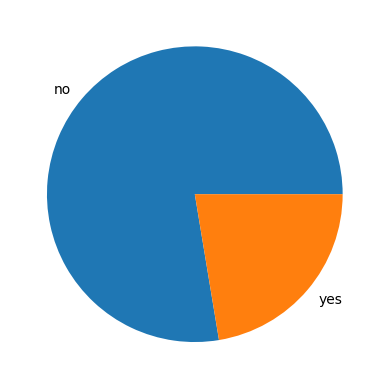

In [169]:
print(df["irradiat"].value_counts())
plt.pie(df['irradiat'].value_counts(), labels = ["no","yes"])
plt.show()

Distribution patients with irradiat
|column_title|Attribute 
|---|---|
irradiat | "yes" : 1, "no" : 0  <br>

<AxesSubplot: >

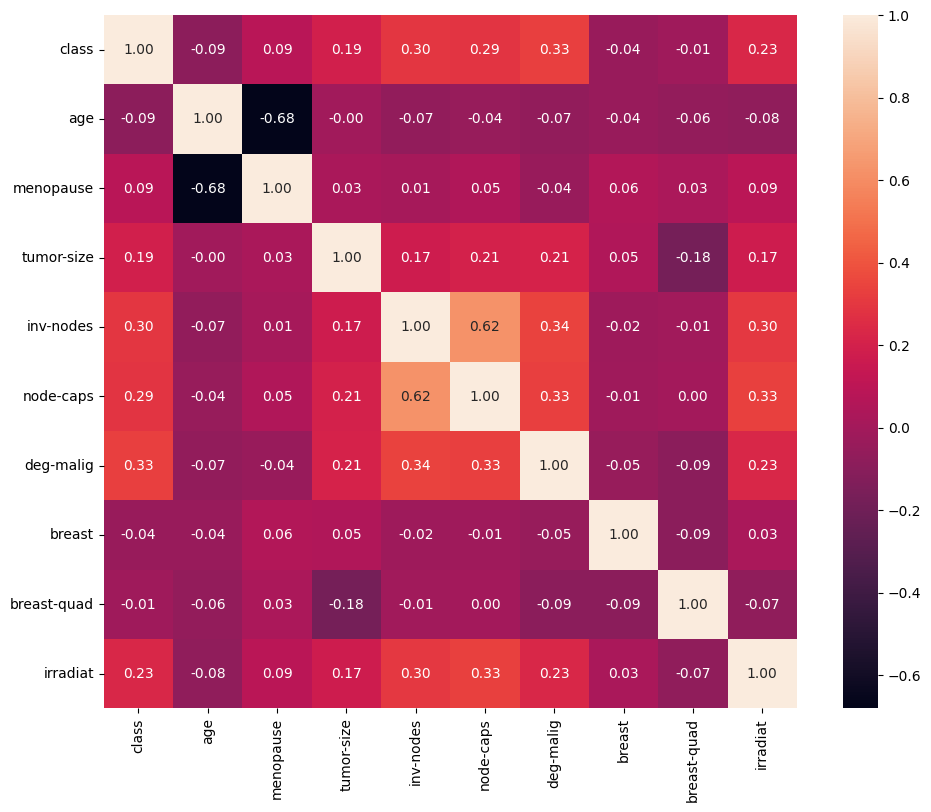

In [170]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax= 1, annot = True, square = True, fmt= ".2f")

Remove attributes that have negative correlations (<0.00) with class.

In [171]:
def cleanDf(argument):
    df.drop(argument,axis = 1, inplace = True)
    df.dropna()

In [172]:
cleanDf("age")
cleanDf("node-caps")
cleanDf("breast")
cleanDf("breast-quad")
cleanDf("irradiat")

In [173]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('class')
    df['class'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return record_list

In [174]:
with open("datasets\Breast Cancer\cleaned_attributes.txt", "w") as output:
    output.write(str(extract_df_col(df)))

['menopause', 'tumor-size', 'inv-nodes', 'deg-malig', 'class']


In [175]:
df

,class,menopause,tumor-size,inv-nodes,deg-malig
0,0,3,7,1,3
1,0,3,5,1,2
2,0,3,5,1,2
3,0,2,4,1,2
4,0,3,1,1,2
...,...,...,...,...,...
281,1,3,7,1,2
282,1,3,5,1,3
283,1,2,5,1,1
284,1,2,7,2,3


## Creating Testing and Training sets

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [177]:
y = df["class"]
x = df.drop("class", axis = 1)

In [178]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (207, 4) (207,)
Test set: 	 (70, 4) (70,)


### Classification Decision Tree Method

In [179]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [180]:
dt_pred = dectree.predict(xTest)
print(dt_pred)

[1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [181]:
bc_dt_df = pd.DataFrame(data = dt_pred, columns = ["class"])
bc_dt_df.head(15)

,class
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [182]:
print("Classification Accuracy for Training set \t: ", dectree.score(xTrain,yTrain))
print("Classification Accuracy for Testing set \t: ", dectree.score(xTest,yTest))

Classification Accuracy for Training set 	:  0.821256038647343
Classification Accuracy for Testing set 	:  0.7714285714285715


In [183]:
dtAccuracy = accuracy_score(yTest,dt_pred)
dtFscore = f1_score(yTest,dt_pred, average = "weighted")
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.7714285714285715
The F score of Decision Tree is 0.7653061224489796


In [184]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,dt_pred)
cm

array([[48,  7],
       [ 9,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

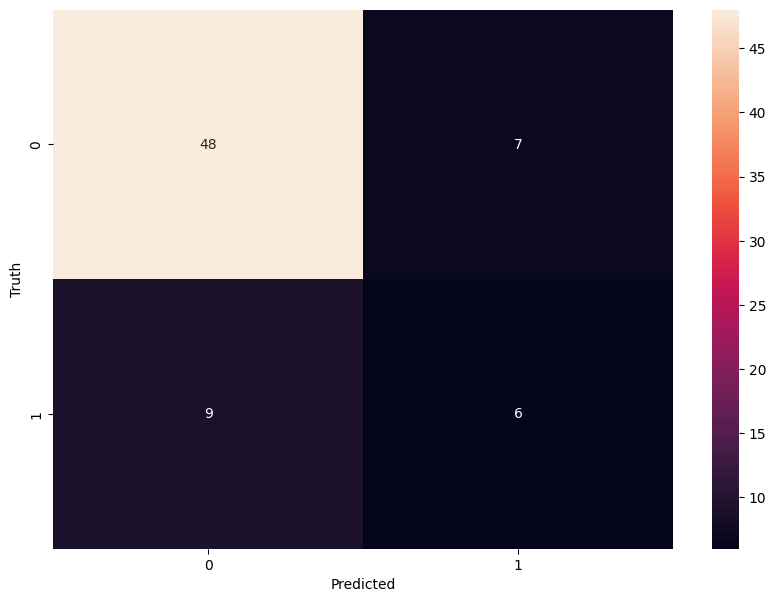

In [185]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [186]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest type", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,menopause,tumor-size,inv-nodes,deg-malig,yTest type
0,2,9,2,2,0
1,2,5,1,1,0
2,3,6,1,2,0
3,2,6,1,3,0
4,3,5,1,2,0
5,3,9,1,1,0
6,2,5,1,2,0
7,3,6,1,1,0
8,2,9,4,3,1
9,3,5,1,3,0


In [187]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", bc_dt_df)
xTestDF.head(20)

,menopause,tumor-size,inv-nodes,deg-malig,yTest type,Decision Tree
0,2,9,2,2,0,1
1,2,5,1,1,0,0
2,3,6,1,2,0,0
3,2,6,1,3,0,0
4,3,5,1,2,0,0
5,3,9,1,1,0,0
6,2,5,1,2,0,1
7,3,6,1,1,0,0
8,2,9,4,3,1,1
9,3,5,1,3,0,0


### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier


index : 7 
Accuracy : 0.8


Text(0, 0.5, 'Testing Accuracy')

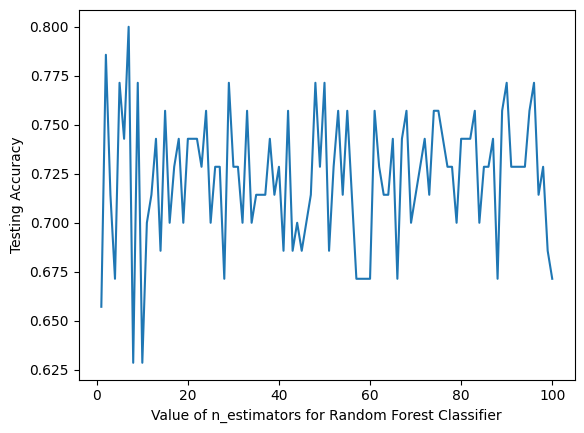

In [189]:
scores =[]
maxAccuracy = 0
maxIndex = 0
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i+1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [190]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=7)

In [191]:
model.score(xTest,yTest)

0.7428571428571429

In [192]:
rf_pred = model.predict(xTest)

In [193]:
rfAccuracy = accuracy_score(yTest,rf_pred)
rfFscore = f1_score(yTest,rf_pred, average = "weighted")
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.7428571428571429
The F score of Random Forest is 0.7485119047619048


In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,rf_pred)
cm

array([[45, 10],
       [ 8,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

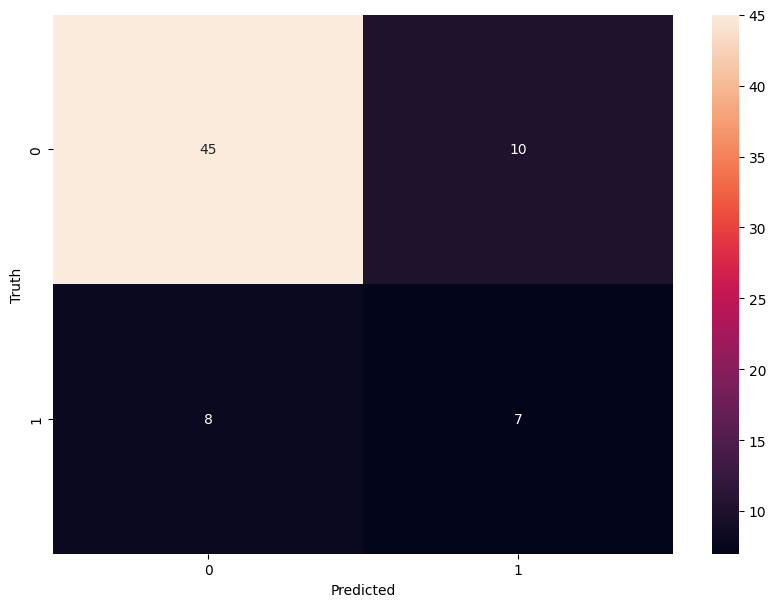

In [195]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [196]:
bc_rf_df = pd.DataFrame(data = rf_pred, columns = ["class"])
bc_rf_df.head(15)

,class
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,0


In [197]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", bc_rf_df)
xTestDF.head(20)

,menopause,tumor-size,inv-nodes,deg-malig,yTest type,Decision Tree,Random Forest
0,2,9,2,2,0,1,0
1,2,5,1,1,0,0,0
2,3,6,1,2,0,0,0
3,2,6,1,3,0,0,1
4,3,5,1,2,0,0,0
5,3,9,1,1,0,0,0
6,2,5,1,2,0,1,1
7,3,6,1,1,0,0,0
8,2,9,4,3,1,1,1
9,3,5,1,3,0,0,0


### K-Nearest-Neighbour Classification

In [198]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    knn_pred= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,knn_pred))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")

K value : 22 
Accuracy : 0.8285714285714286


Text(0, 0.5, 'Testing Accuracy')

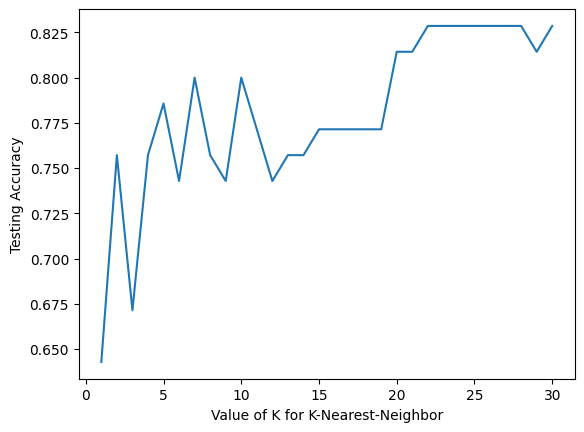

In [199]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

In [200]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=22)

Select maxKValue of nearest neighbour with the highest accuracy

In [201]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1]


In [202]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted,average = "weighted")
print(f"The accuracy of K-Nearest-Neighbour is {knnAccuracy}")
print(f"The F score of K-Nearest-Neighbour is {knnFscore}")

The accuracy of K-Nearest-Neighbour is 0.8285714285714286
The F score of K-Nearest-Neighbour is 0.8183921341816079


In [203]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[51,  4],
       [ 8,  7]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

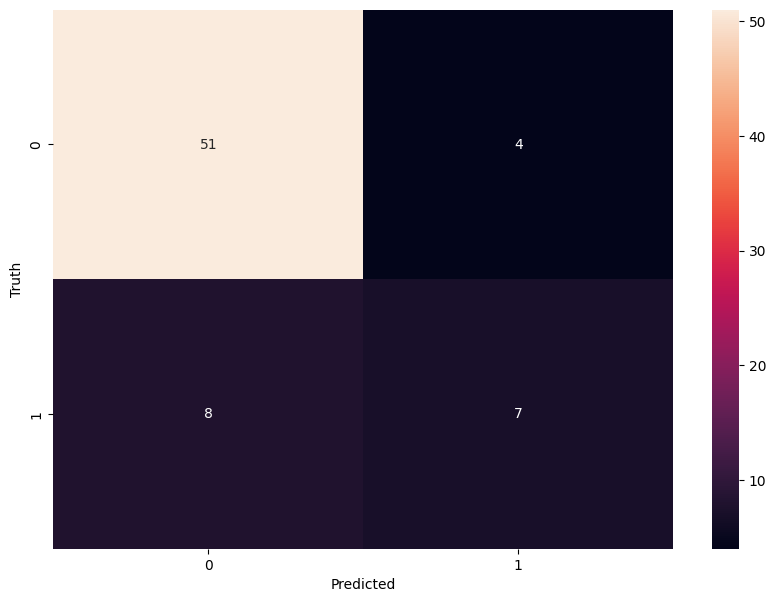

In [204]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [205]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["class"])
knnPredictedDF.head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [206]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,menopause,tumor-size,inv-nodes,deg-malig,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors
0,2,9,2,2,0,1,0,0
1,2,5,1,1,0,0,0,0
2,3,6,1,2,0,0,0,0
3,2,6,1,3,0,0,1,0
4,3,5,1,2,0,0,0,0
5,3,9,1,1,0,0,0,0
6,2,5,1,2,0,1,1,0
7,3,6,1,1,0,0,0,0
8,2,9,4,3,1,1,1,1
9,3,5,1,3,0,0,0,0


### Support Vector Machines

In [207]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [208]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]


In [209]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.8285714285714286
The F score of Support Vector Machines is 0.8115763546798028


In [210]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[52,  3],
       [ 9,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

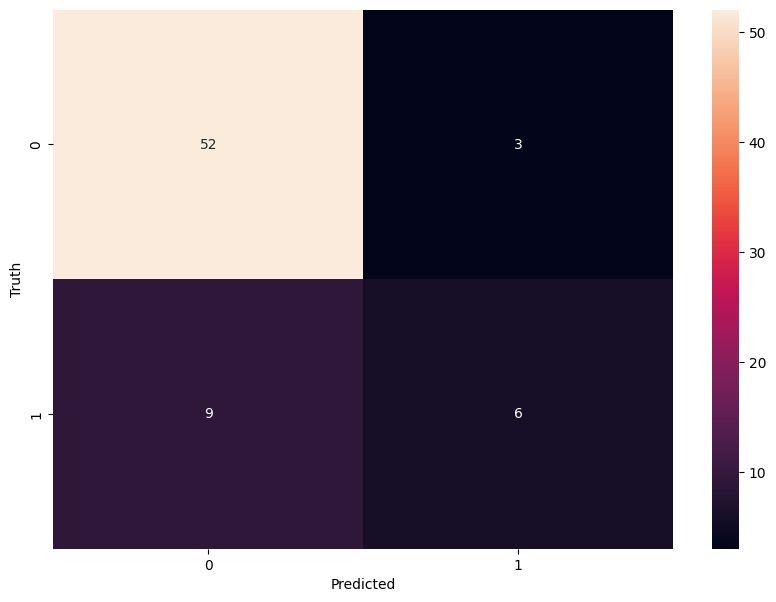

In [211]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [212]:
bc_svm_df = pd.DataFrame(data = svm_pred, columns = ["class"])
bc_svm_df.head(15)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [213]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", bc_svm_df)
xTestDF.head(20)

,menopause,tumor-size,inv-nodes,deg-malig,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,2,9,2,2,0,1,0,0,0
1,2,5,1,1,0,0,0,0,0
2,3,6,1,2,0,0,0,0,0
3,2,6,1,3,0,0,1,0,0
4,3,5,1,2,0,0,0,0,0
5,3,9,1,1,0,0,0,0,0
6,2,5,1,2,0,1,1,0,0
7,3,6,1,1,0,0,0,0,0
8,2,9,4,3,1,1,1,1,1
9,3,5,1,3,0,0,0,0,0


### Neural Network

In [214]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(4,), random_state=1, max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [215]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1]


In [216]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.8285714285714286
The F score of Neural Network is 0.8239795918367347


In [217]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[50,  5],
       [ 7,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

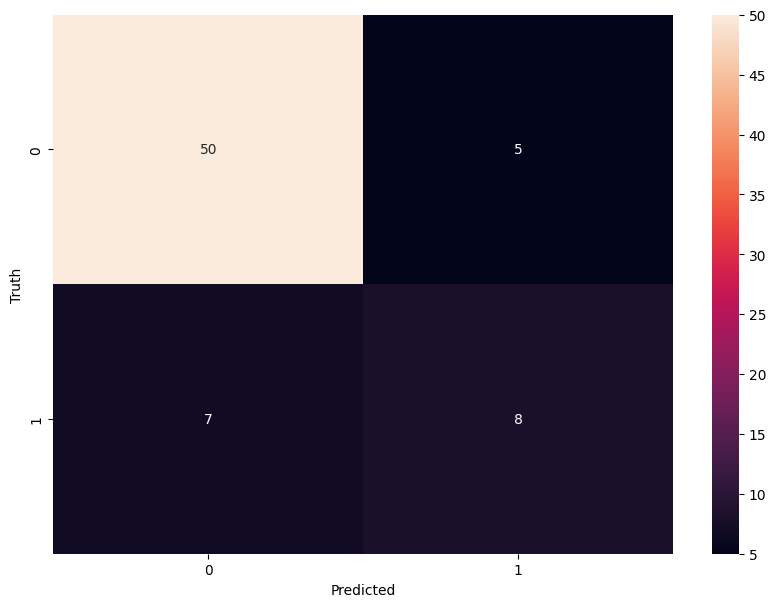

In [218]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [219]:
bc_nn_df = pd.DataFrame(data = nn_pred, columns = ["class"])
bc_nn_df.head(15)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [220]:
xTestDF.insert(len(xTestDF.columns), "Neural Network", bc_nn_df)
xTestDF.head(20)

,menopause,tumor-size,inv-nodes,deg-malig,yTest type,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines,Neural Network
0,2,9,2,2,0,1,0,0,0,0
1,2,5,1,1,0,0,0,0,0,0
2,3,6,1,2,0,0,0,0,0,0
3,2,6,1,3,0,0,1,0,0,0
4,3,5,1,2,0,0,0,0,0,0
5,3,9,1,1,0,0,0,0,0,0
6,2,5,1,2,0,1,1,0,0,0
7,3,6,1,1,0,0,0,0,0,0
8,2,9,4,3,1,1,1,1,1,1
9,3,5,1,3,0,0,0,0,0,1


# Evaluation Metrics of Machine Learning Algorithms

In [221]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore], 
                   "SVM" : [svmAccuracy,svmFscore],
                   "NN" : [nnAccuracy,nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree", "SVM", "NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.828571,0.742857,0.771429,0.828571,0.828571
Fscore,0.818392,0.748512,0.765306,0.811576,0.823980
